# 2. Multiple Regression
- Import Necessary Libraries and import dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("BodyFat.csv")

In [2]:
dataset.head()

IDNO  BODYFAT  DENSITY  AGE  WEIGHT  HEIGHT  ADIPOSITY  NECK  CHEST  \
0     1     12.6   1.0708   23  154.25   67.75       23.7  36.2   93.1   
1     2      6.9   1.0853   22  173.25   72.25       23.4  38.5   93.6   
2     3     24.6   1.0414   22  154.00   66.25       24.7  34.0   95.8   
3     4     10.9   1.0751   26  184.75   72.25       24.9  37.4  101.8   
4     5     27.8   1.0340   24  184.25   71.25       25.6  34.4   97.3   

   ABDOMEN    HIP  THIGH  KNEE  ANKLE  BICEPS  FOREARM  WRIST  
0     85.2   94.5   59.0  37.3   21.9    32.0     27.4   17.1  
1     83.0   98.7   58.7  37.3   23.4    30.5     28.9   18.2  
2     87.9   99.2   59.6  38.9   24.0    28.8     25.2   16.6  
3     86.4  101.2   60.1  37.3   22.8    32.4     29.4   18.2  
4    100.0  101.9   63.2  42.2   24.0    32.2     27.7   17.7

- IV Columns중 어떤 IV가 DV의 결과에 영향을 더 미치는지를 파악하는것이 목표

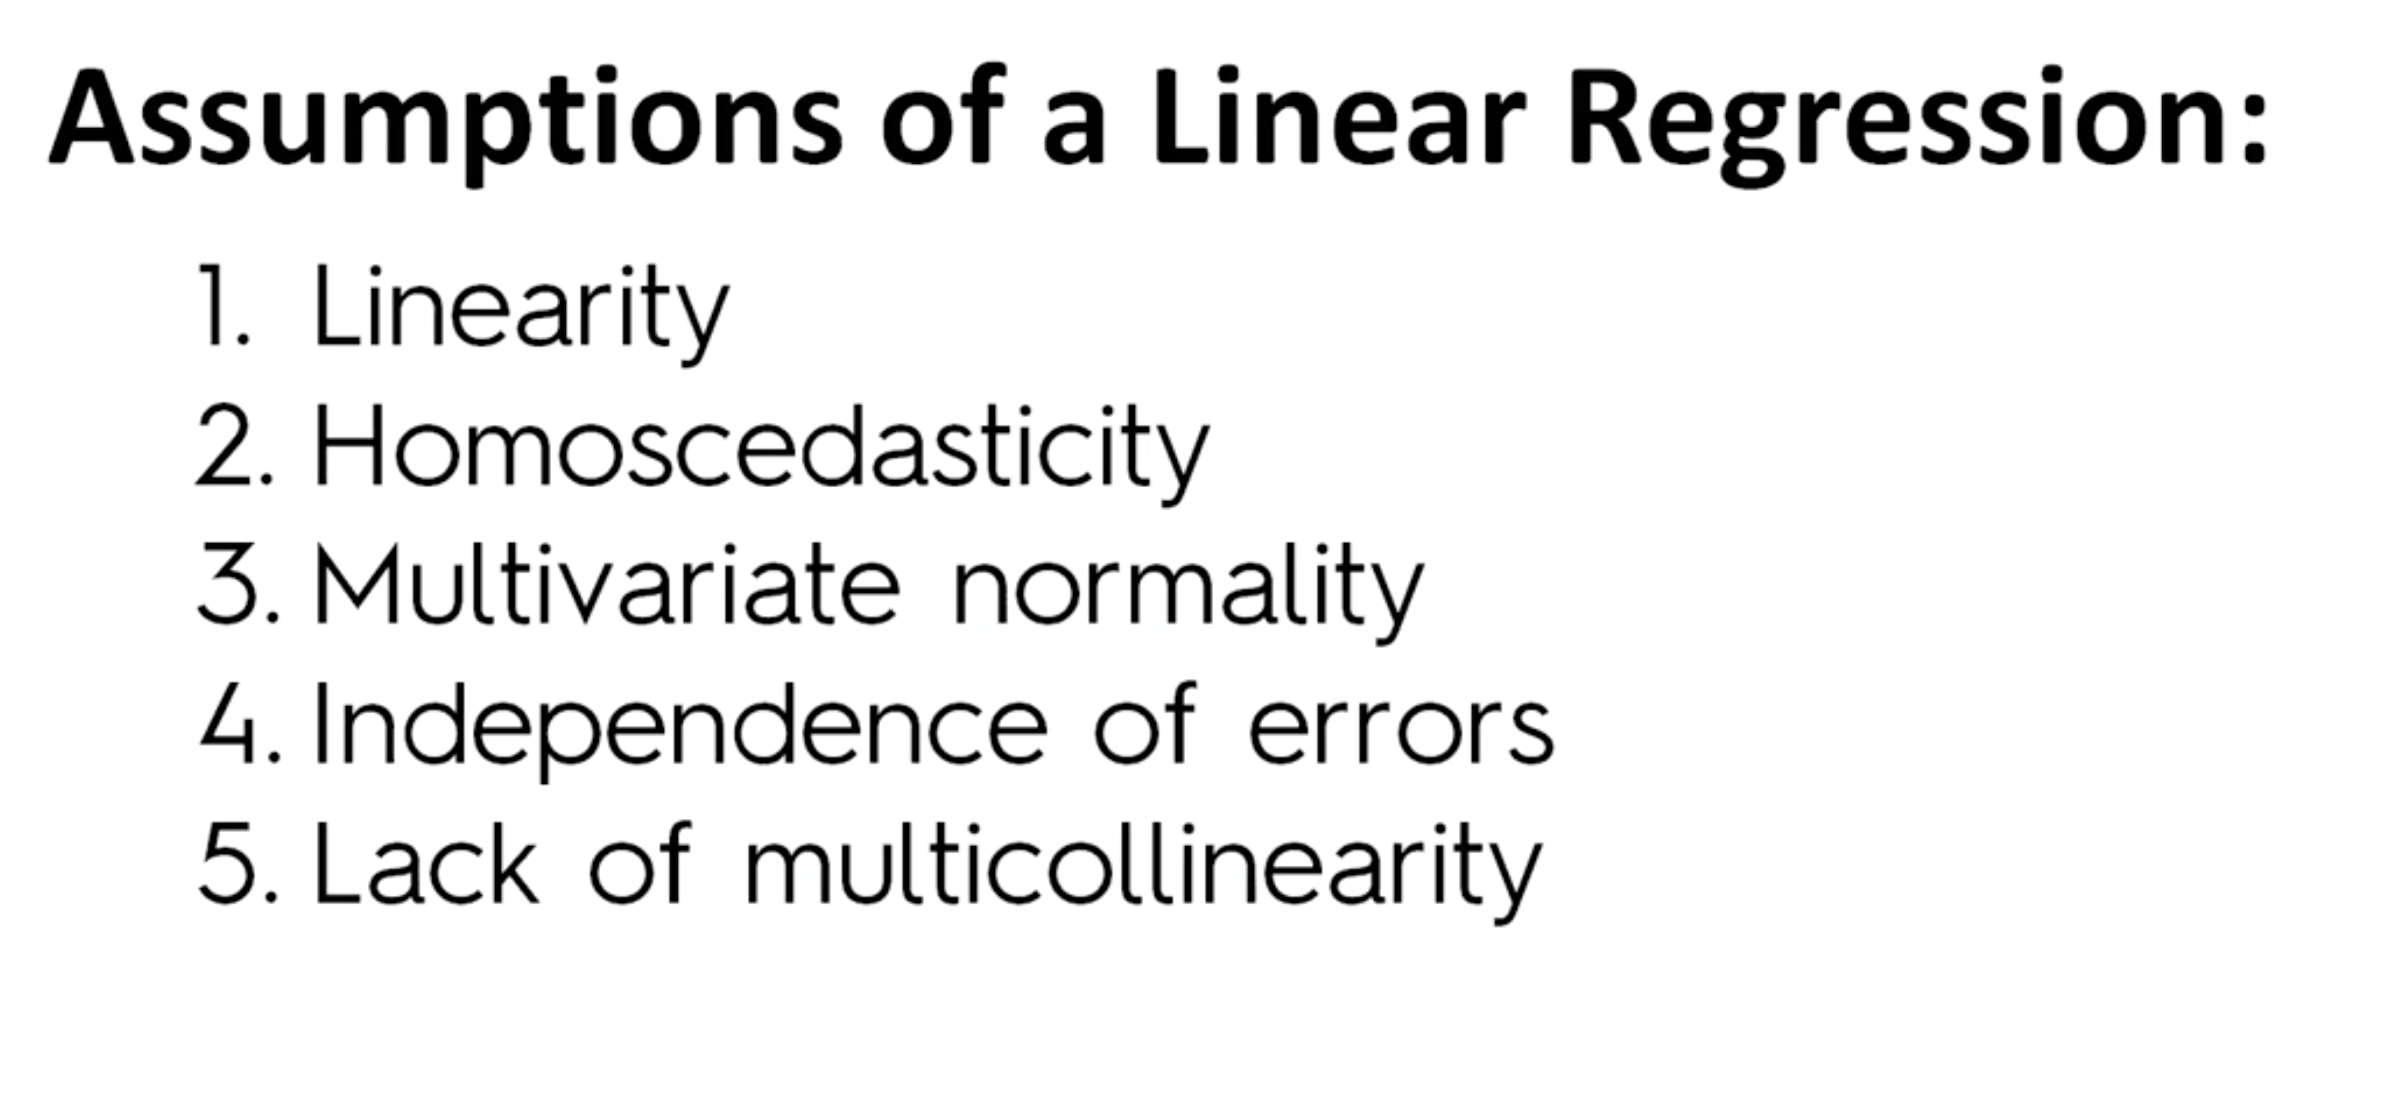

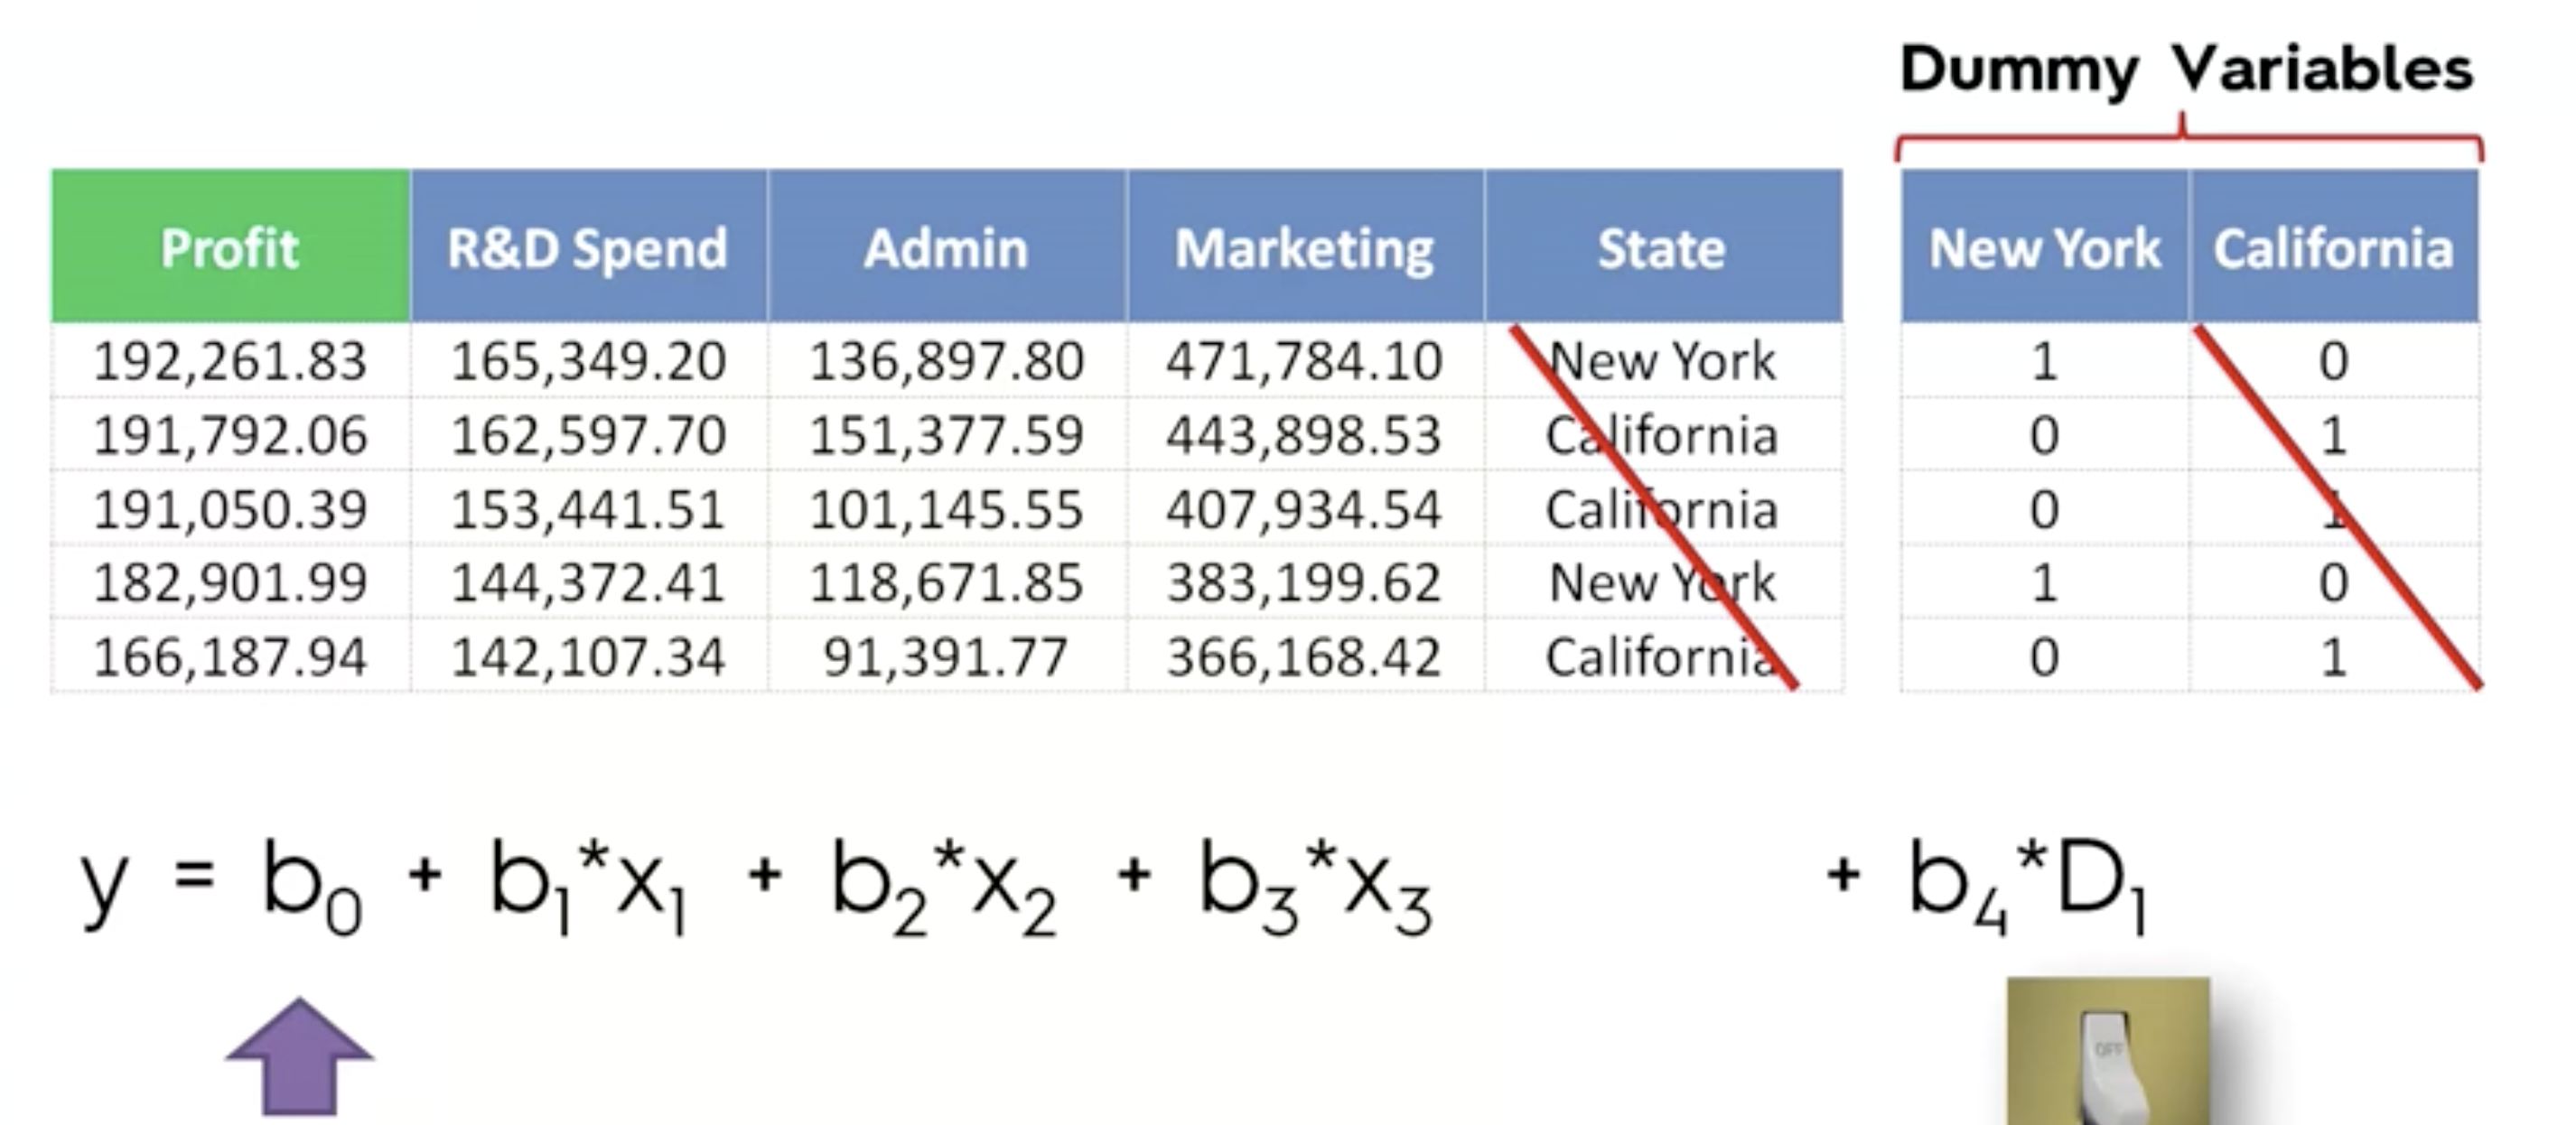
- Never include every dummy variable into the equation (Dummy Variable Trap)

#### P-Value
- The p-value is actually the probability of getting a sample like ours, or more extreme than ours IF the null hypothesis is true

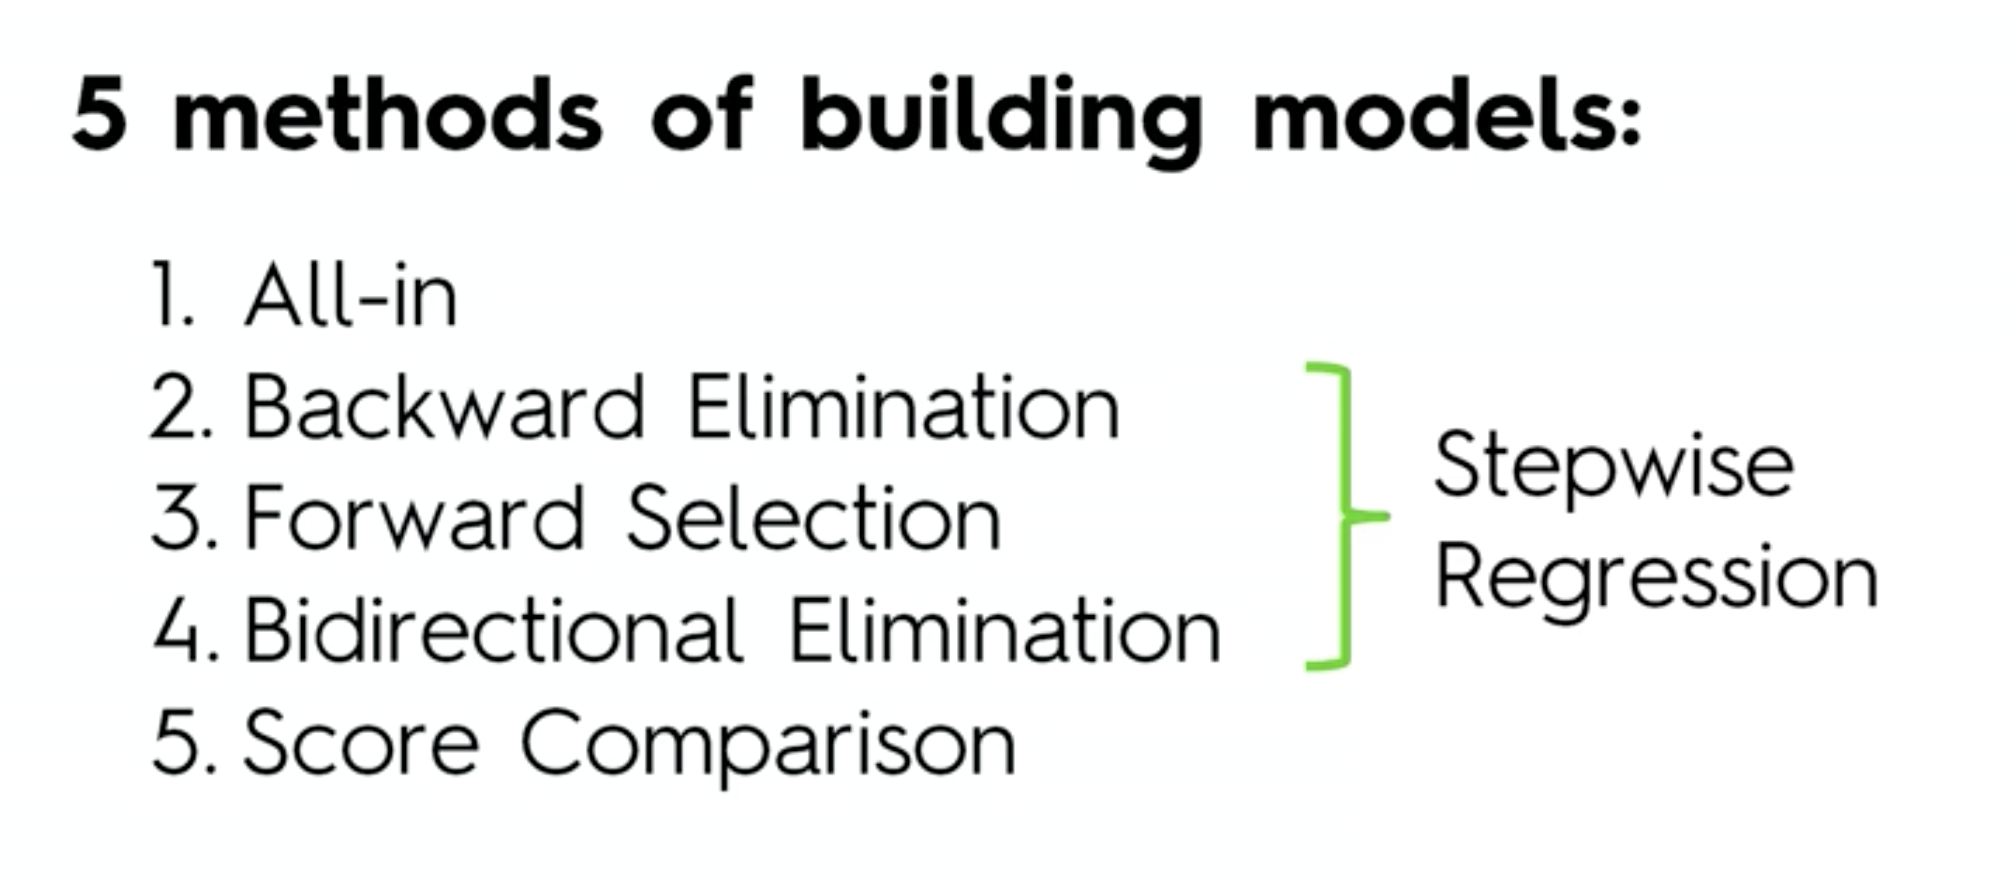

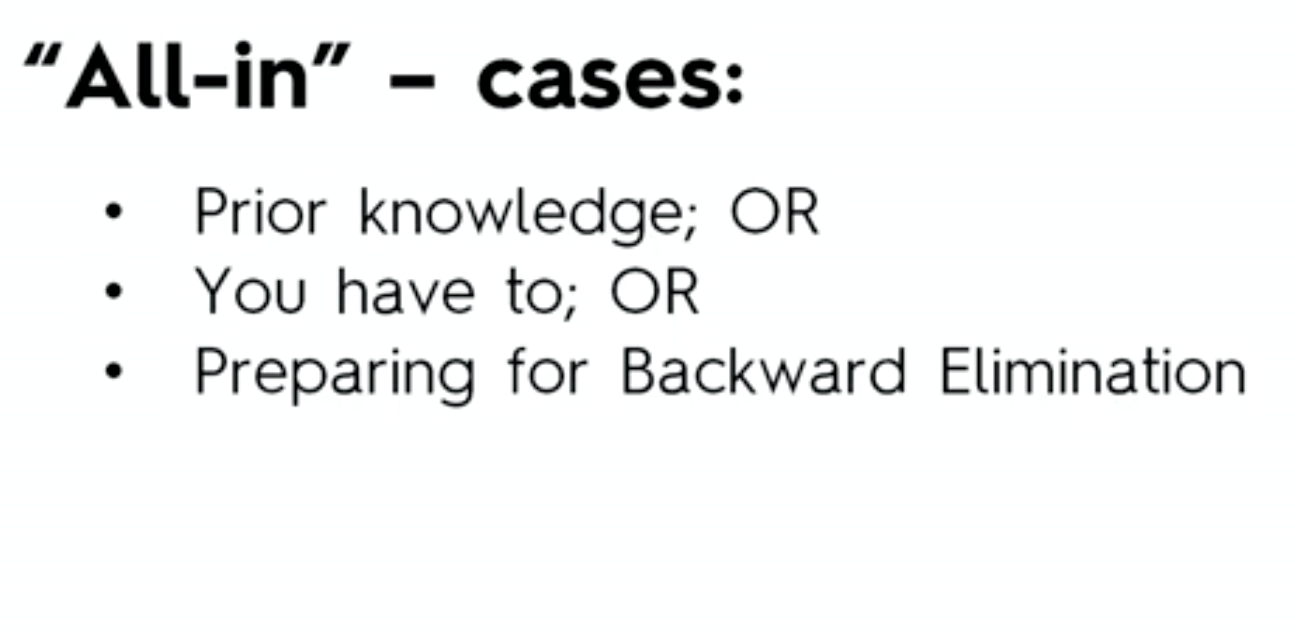

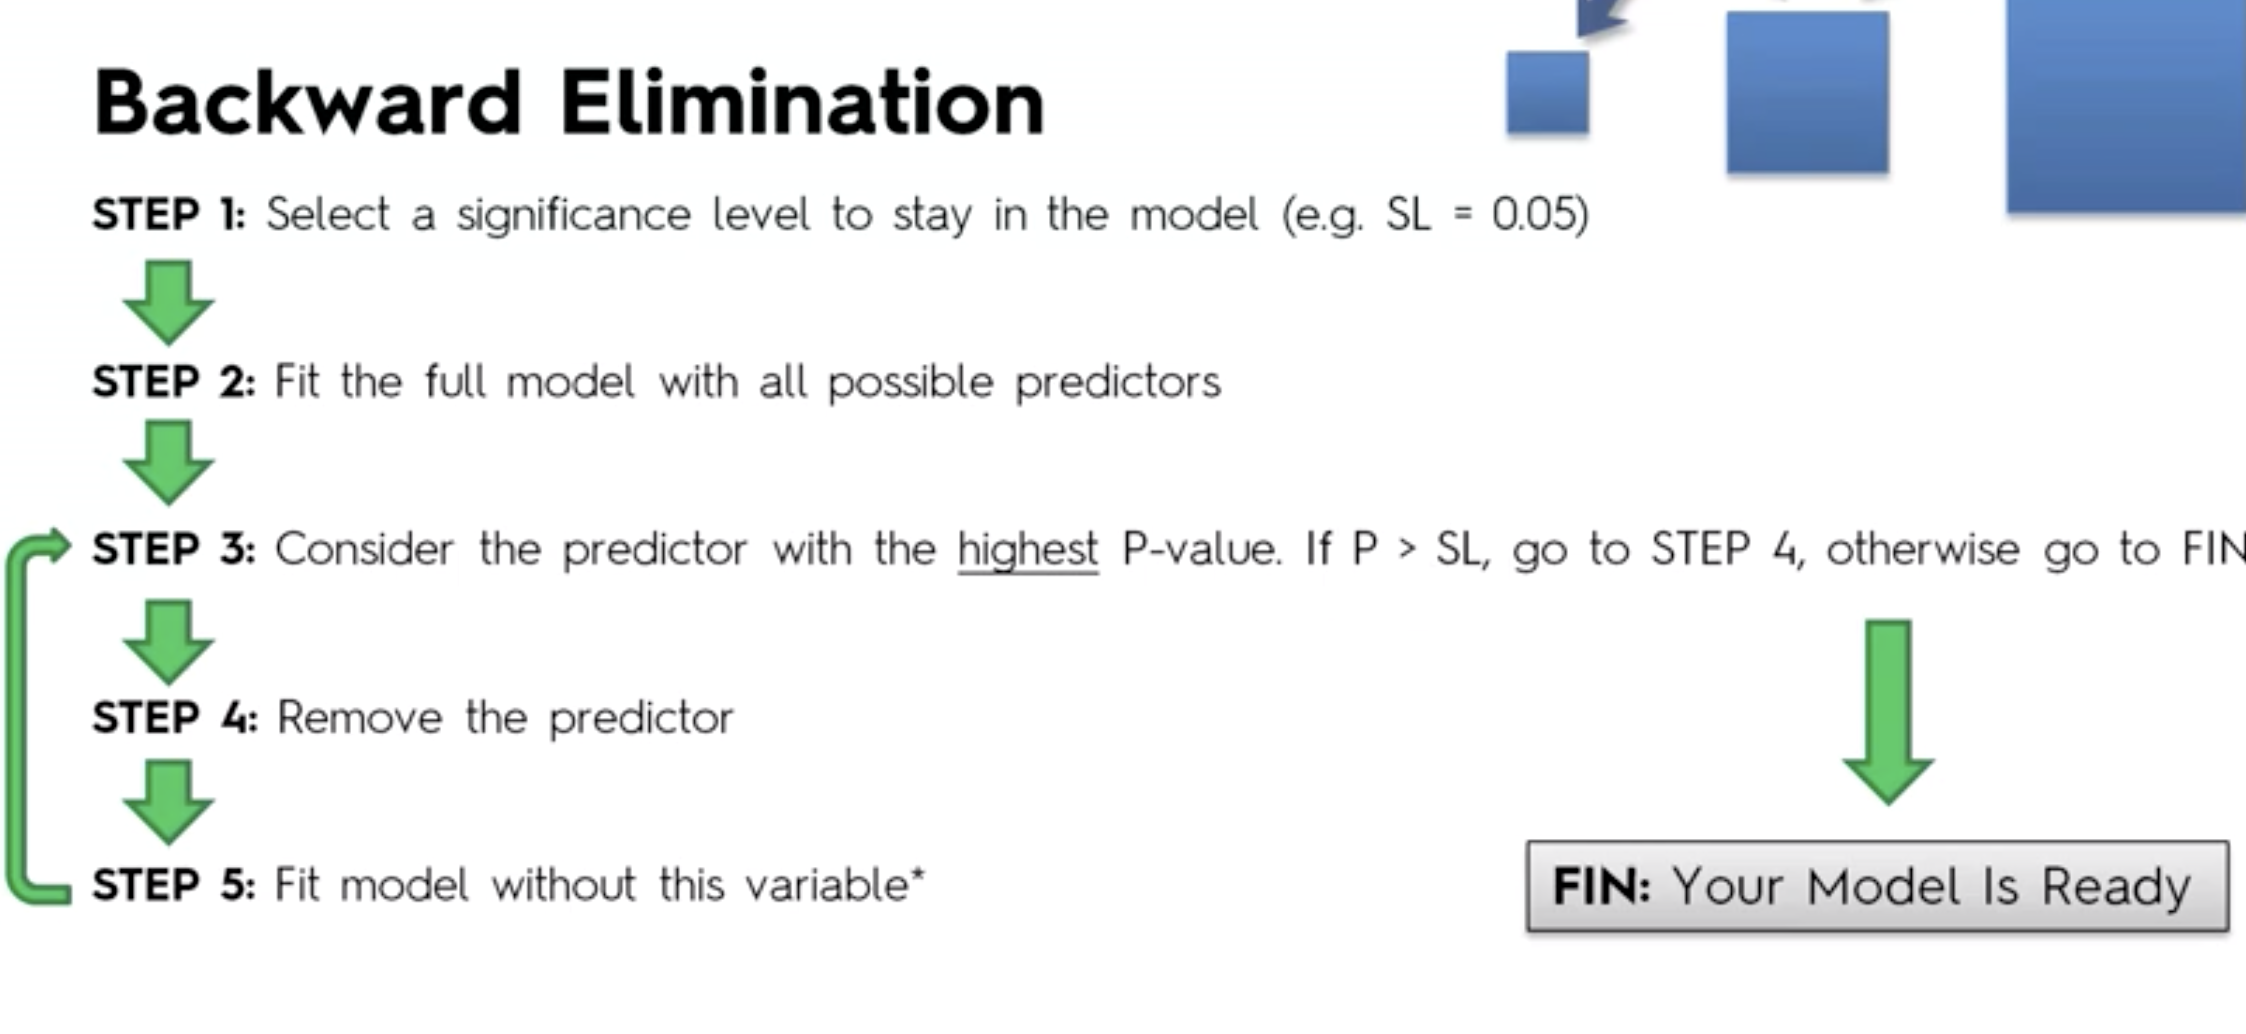

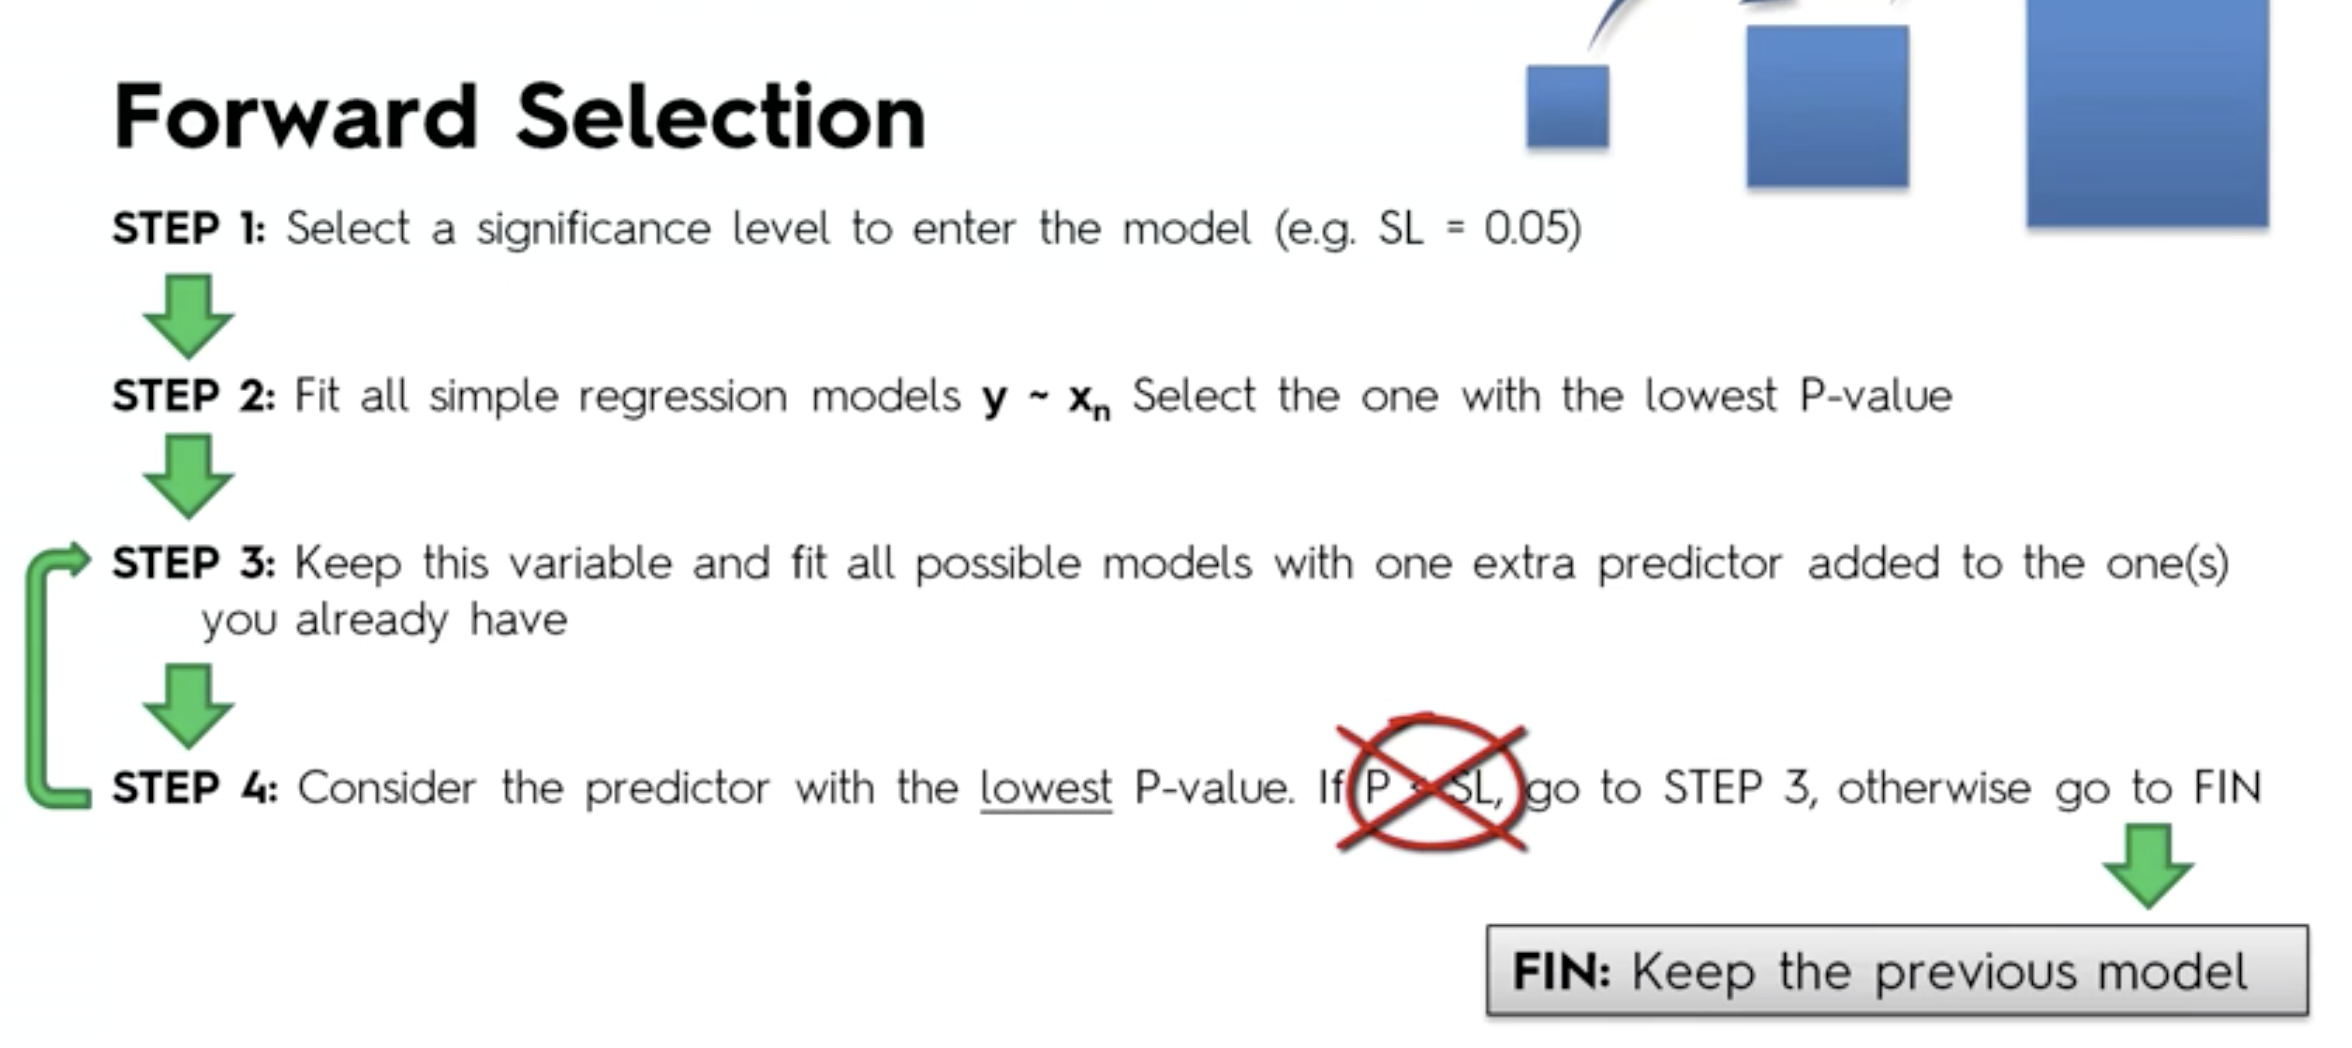

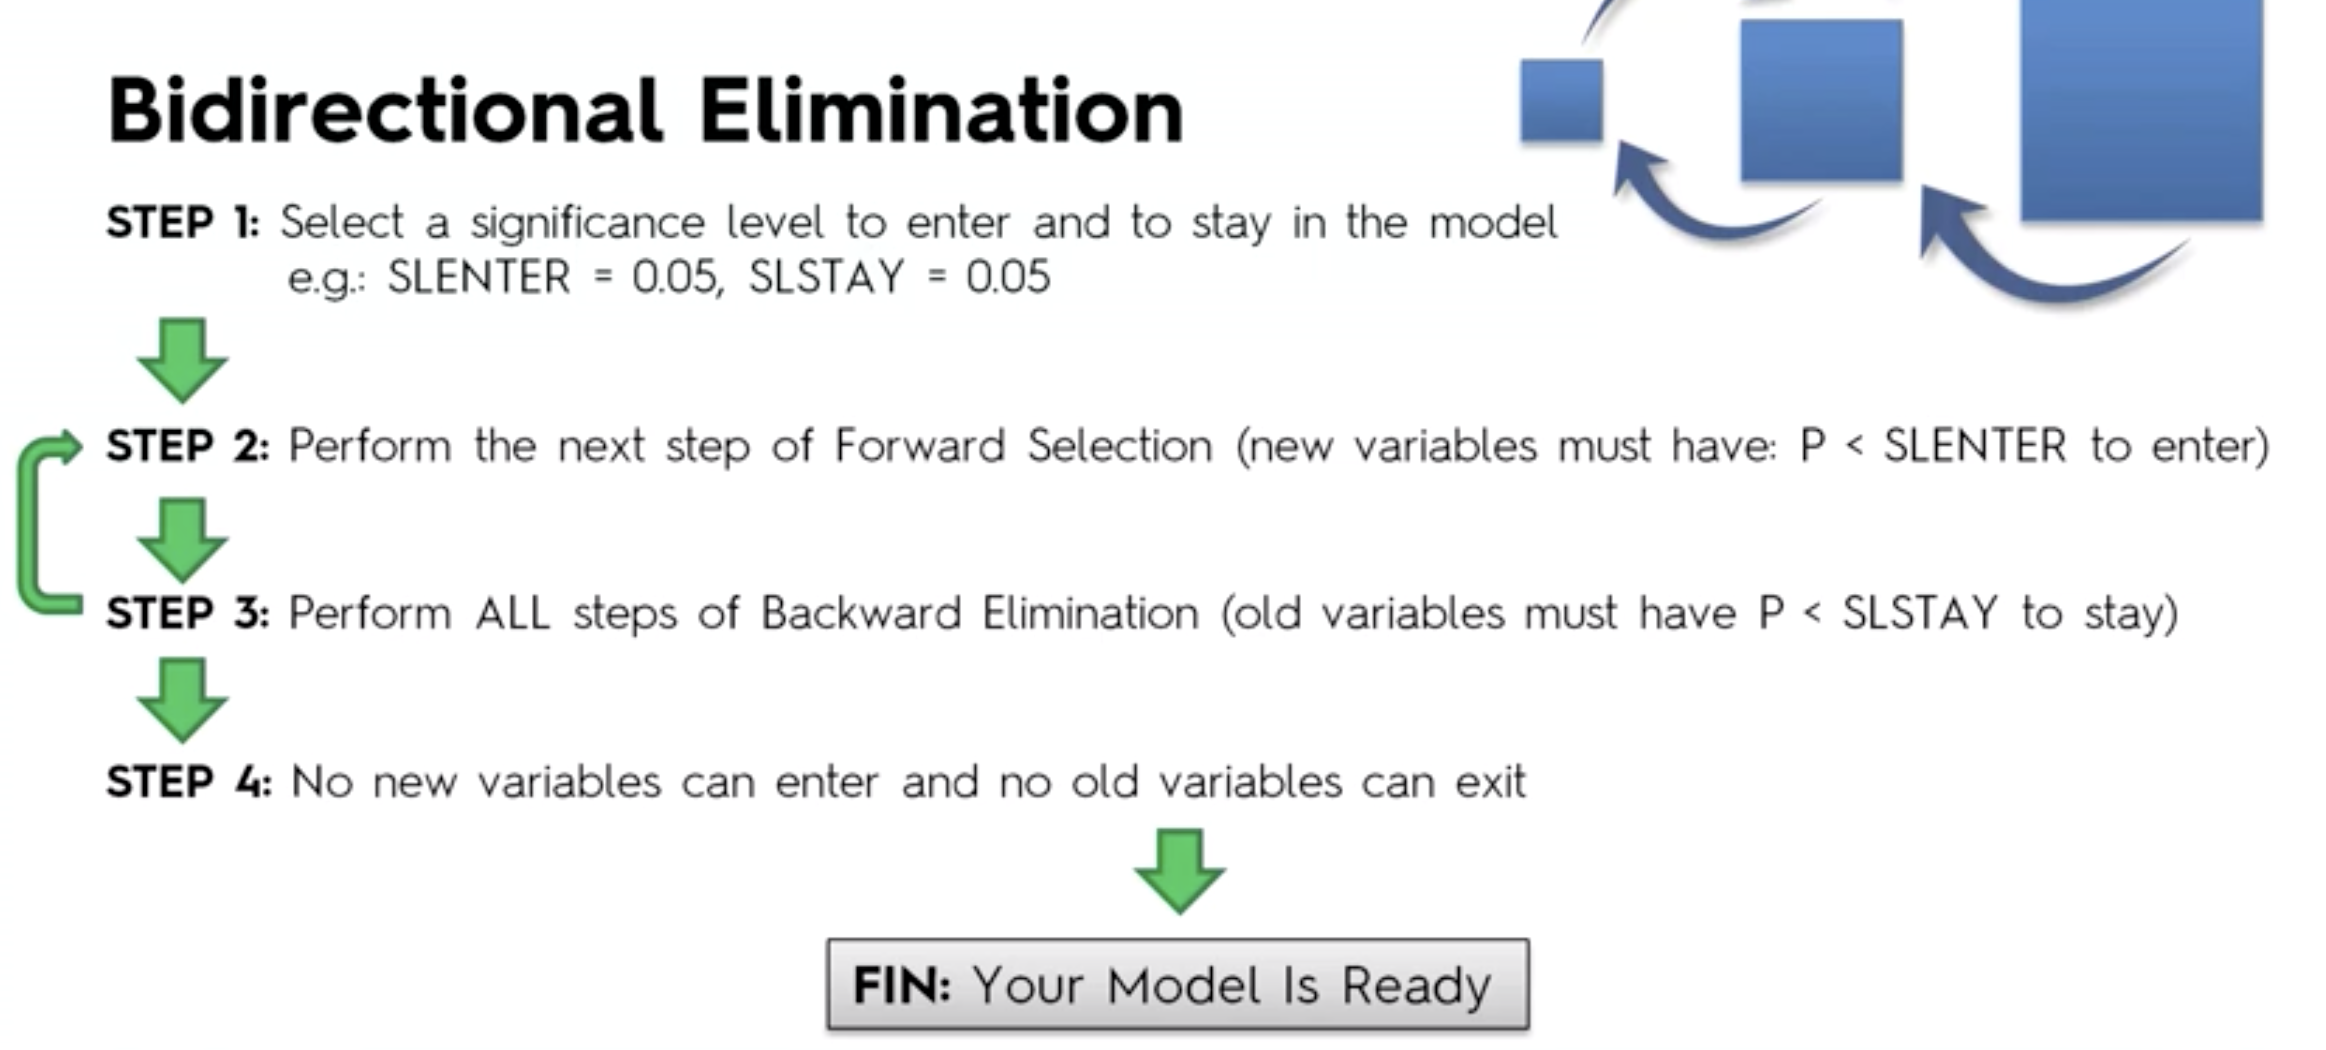

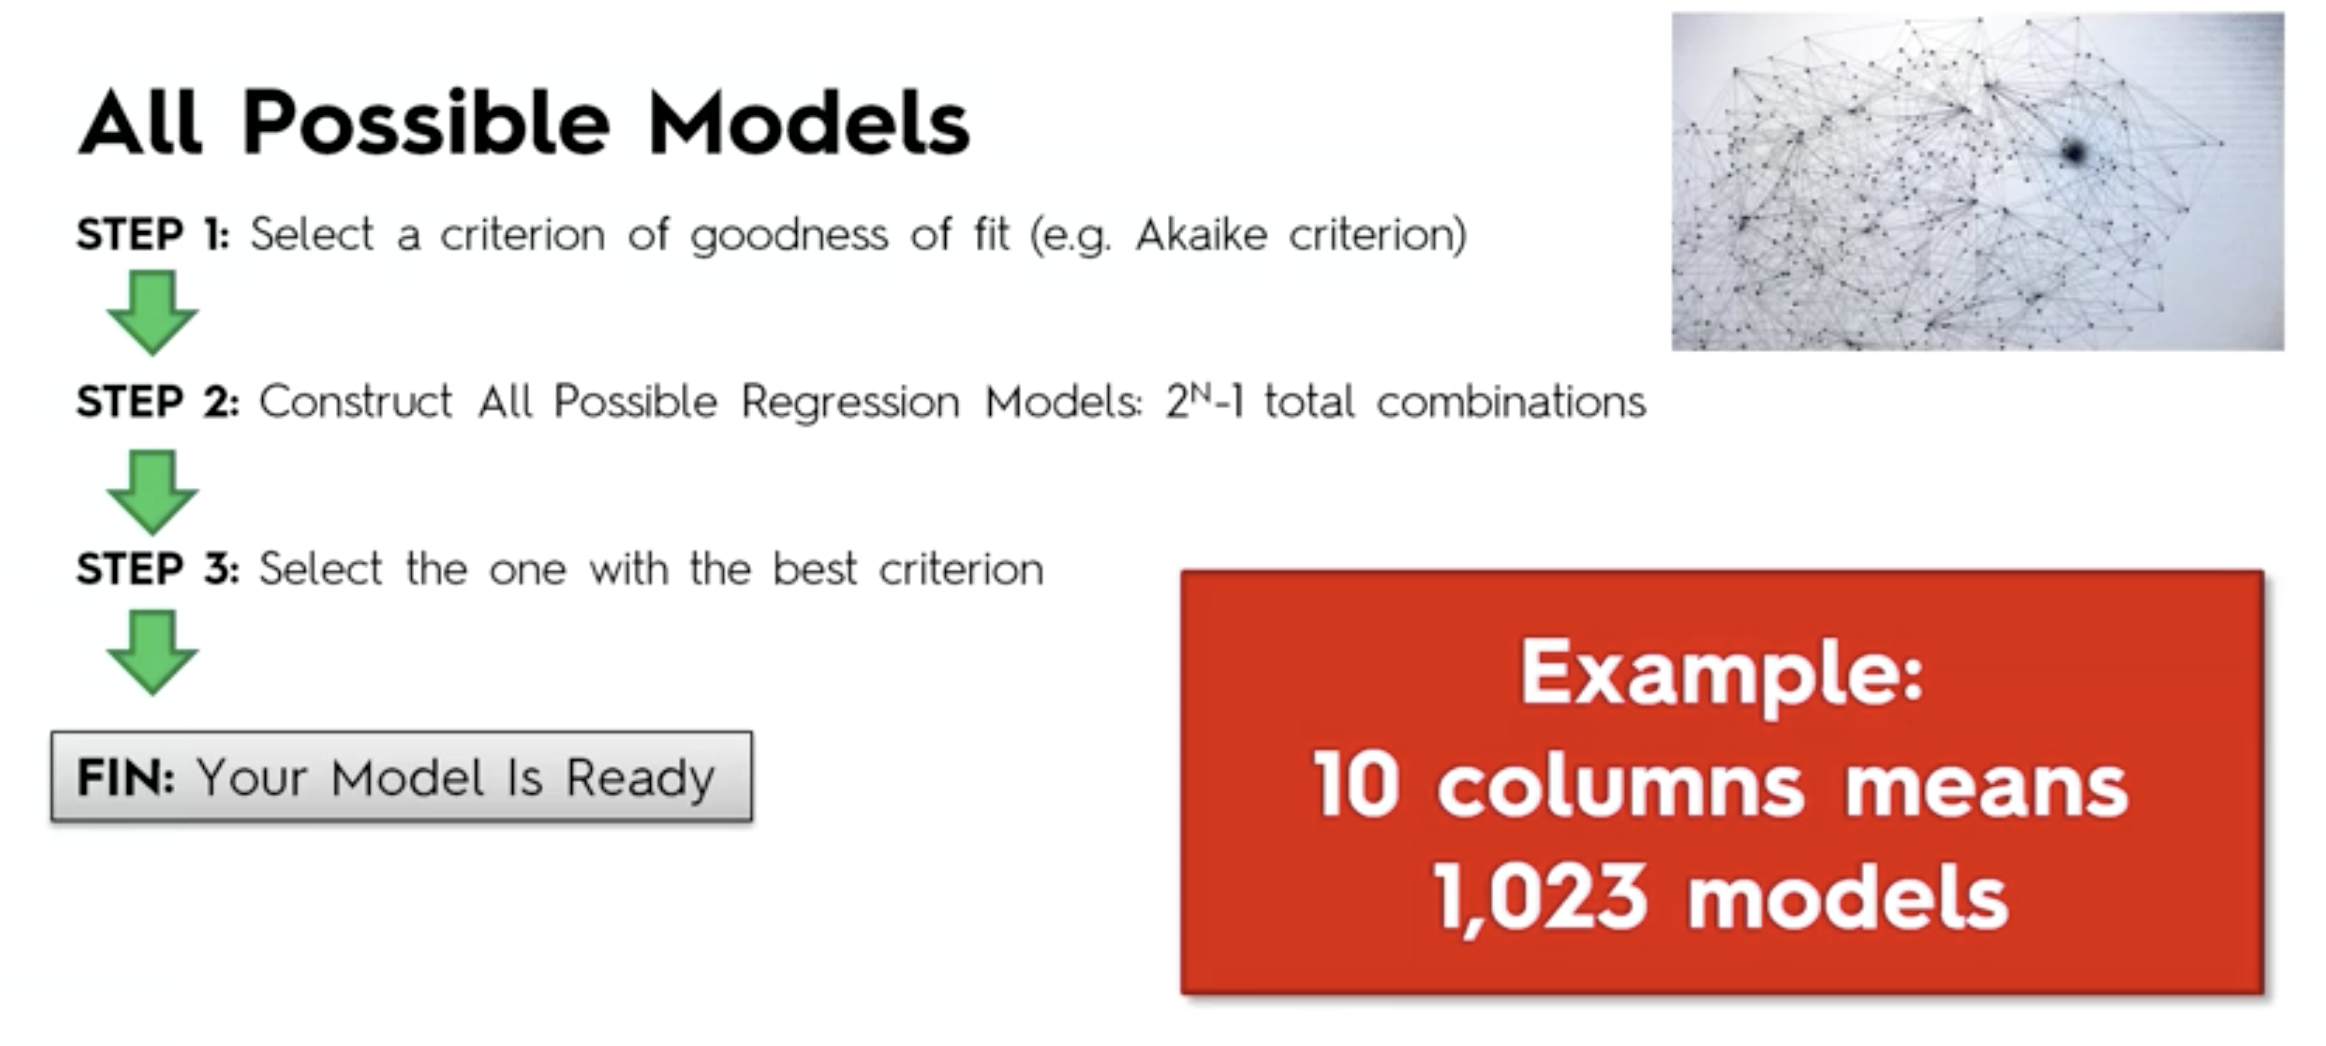

In [ ]:
dataset

In [3]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, 1].values

In [4]:
X

array([[  1.0708,  23.    , 154.25  , ...,  21.9   ,  32.    ,  27.4   ],
       [  1.0853,  22.    , 173.25  , ...,  23.4   ,  30.5   ,  28.9   ],
       [  1.0414,  22.    , 154.    , ...,  24.    ,  28.8   ,  25.2   ],
       ...,
       [  1.0328,  72.    , 186.75  , ...,  21.5   ,  31.3   ,  27.2   ],
       [  1.0399,  72.    , 190.75  , ...,  22.7   ,  30.5   ,  29.4   ],
       [  1.0271,  74.    , 207.5   , ...,  24.6   ,  33.7   ,  30.    ]])

- Remember to Encode Categorical Variables using One-Hot-Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X_encoder = ColumnTransformer([('iv_encoder',OneHotEncoder(sparse = False),[3]),],remainder='passthrough')

In [ ]:
X = X_encoder.fit_transform(X)

- 위에서 말한것처럼 Dummy Variable Trap을 피하기 위해 3개중 하나를 omit해준다.

In [ ]:
X = X[:,1:]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
#import LinearRegression
from sklearn.linear_model import LinearRegression #import class
regressor = LinearRegression() #Instantiate
regressor.fit(X_train, y_train) #Fit to our Dataset

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
y_pred

array([12.90675693, 25.99438341,  4.01236571, 20.3853917 ,  9.8167454 ,
       22.1133951 , 24.40843533, 24.83938074, 25.06679191, 26.33929805,
       24.78114125, 16.04084726, 20.74241815, 20.56477655, 16.12800799,
       13.37434247, 16.40650191,  1.96723752, 10.78381542, 12.05902191,
       20.39034674, 14.38470824, 28.20579431, 21.56340784, 19.2376333 ,
       30.82265894,  5.38566647, 22.53041995, 21.0574123 , 27.18603284,
       29.47506785, 25.72036951, 27.01987354, 11.9162198 , 34.28126991,
       13.87582913, 23.9157868 , 20.88289551, 15.0874216 , 11.69086058,
       17.61903878, 20.62130083, 33.54224381, 21.7388981 , 20.57567823,
       15.07821918, 13.28628424,  8.04646985, 30.53385768, -2.88807777,
        9.53869326])

In [9]:
compare_Matrix = np.reshape(y_test,(-1,1))
np.append(compare_Matrix, np.reshape(y_pred,(-1,1)),axis=1)

array([[12.8       , 12.90675693],
       [26.2       , 25.99438341],
       [ 4.1       ,  4.01236571],
       [20.1       , 20.3853917 ],
       [ 9.9       ,  9.8167454 ],
       [22.6       , 22.1133951 ],
       [25.1       , 24.40843533],
       [24.5       , 24.83938074],
       [25.1       , 25.06679191],
       [26.3       , 26.33929805],
       [24.5       , 24.78114125],
       [15.5       , 16.04084726],
       [21.        , 20.74241815],
       [20.2       , 20.56477655],
       [16.5       , 16.12800799],
       [13.7       , 13.37434247],
       [16.6       , 16.40650191],
       [ 1.9       ,  1.96723752],
       [10.5       , 10.78381542],
       [11.1       , 12.05902191],
       [20.1       , 20.39034674],
       [14.1       , 14.38470824],
       [28.8       , 28.20579431],
       [21.8       , 21.56340784],
       [19.5       , 19.2376333 ],
       [30.7       , 30.82265894],
       [ 5.1       ,  5.38566647],
       [22.2       , 22.53041995],
       [21.5       ,

In [10]:
regressor.coef_

array([-3.80479133e+02,  1.39647683e-02,  8.90423744e-03, -1.48678029e-02,
       -8.60188092e-02, -1.08112228e-02,  5.27045098e-02,  1.71028679e-02,
        2.34460649e-02,  1.75757085e-02, -3.10239278e-02, -6.75200483e-02,
       -8.16556628e-02,  6.38821157e-02])

# 이건 다른 방법이얌.

In [11]:
#Lets implement Backward_Elimination method for optimal model
import statsmodels.formula.api as sm

##### Backward-Elimination 방법은 predictor 개개인의 significance level을 하나씩 보면서 제거해나가는 형식

In [15]:
X_opt = X[:,:].astype(float)

In [16]:
#우리가 현재 가지고 있는 regressor모델은 이미 fit이 된 모델이고, backward-Elimination은 stepwise로 regressing 해줘야하므로 새로운 모델을 선언
regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit()

In [17]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     617.9
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          3.16e-178
Time:                        20:18:31   Log-Likelihood:                -662.04
No. Observations:                 252   AIC:                             1352.
Df Residuals:                     238   BIC:                             1401.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -101.4484     10.356     -9.796      0.000    -121.849     -81.048
x2             0.0262      0.024      1.077      0.283      -0.022       0.074
x3            -0.3320      0.036     -9.229      0.000      -0.403      -0.261
x4             0.2517      0.087      2.897      0.004       0.081       0.423
x5            -0.0258      0.240     -0.108      0.914      -0.498       0.446
x6            -0.0036      0.184     -0.019      0.984      -0.366       0.359
x7             0.2315      0.083      2.783      0.006       0.068       0.395
x8             0.6693      0.077      8.673      0.000       0.517       0.821
x9             0.3492      0.117      2.994      0.003       0.119       0.579
x10            0.2415      0.116      2.076      0.039       0.012       0.471
x11            0.2747      0.196      1.399      0.163      -0.112       0.661
x12            0.2710      0.172      1.572      0.117      -0.069       0.611
x13            0.1541      0.137      1.121      0.264      -0.117       0.425
x14            0.3841      0.156      2.462      0.015       0.077       0.691
==============================================================================
Omnibus:                        0.360   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.476
Skew:                          -0.077   Prob(JB):                        0.788
Kurtosis:                       2.853   Cond. No.                     1.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_mask = np.array([True, True, True, True, True, True, False, True, True, True, True, True, True, True])
while max(regressor_OLS.pvalues) > 0.05:
    omit_index = np.where(regressor_OLS.pvalues == max(regressor_OLS.pvalues))[0][0] #Local(원본말고 Current) Omitting Index
    X_mask[np.where(X_mask)[0][omit_index]] = False #원본X에서의 해당index
    X_opt = X[:,X_mask].astype(float)
    regressor_OLS = sm.OLS(endog=y,exog=X_opt).fit() 

In [19]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          9.65e-185
Time:                        20:21:56   Log-Likelihood:                -671.29
No. Observations:                 252   AIC:                             1357.
Df Residuals:                     245   BIC:                             1381.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -83.3362      8.194    -10.171      0.000     -99.475     -67.198
x2            -0.2707      0.029     -9.472      0.000      -0.327      -0.214
x3             0.1822      0.073      2.479      0.014       0.037       0.327
x4             0.8119      0.047     17.128      0.000       0.719       0.905
x5             0.3510      0.099      3.546      0.000       0.156       0.546
x6             0.4118      0.178      2.320      0.021       0.062       0.762
x7             0.5732      0.142      4.044      0.000       0.294       0.852
==============================================================================
Omnibus:                        2.901   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.273
Skew:                          -0.090   Prob(JB):                        0.321
Kurtosis:                       2.571   Cond. No.                     8.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
X_mask #여기에 True로 남은애들이 최종 X로 쓰인놈들

array([ True, False,  True,  True, False, False, False,  True,  True,
       False,  True, False, False,  True])